In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import argparse
import pickle
from constants import *

# Set the font globally
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'Times New Roman'

parser = argparse.ArgumentParser()
parser.add_argument('--trial', type=str, help='trial name')
parser.add_argument('--log_dir', type=str, default='log', help='log file directory')
parser.add_argument('--pkl_path', type=str, default='')
parser.add_argument('--target', type=str, default='mrr', choices=['mrr', 'epoch'])
parser.add_argument('--num_scope', type=int, default=25, help='trial name')
parser.add_argument('--num_neighbor', type=int, default=10, help='trial name')
parser.add_argument('--runs', type=int, default=5, help='trial name')
parser.add_argument('--layers', type=int, default=1, help='layer number')
parser.add_argument('--fontsize', type=int, default=32, help='font size')
parser.add_argument('--no_title', action='store_true')
parser.add_argument('--save_legends', action='store_true')

args = parser.parse_args(['--layers', '1', '--pkl_path', '../all_mrrs_0318.pkl'])
log_dir = args.log_dir
config_dir = 'config' + '/{}'.format(args.trial)
# Optionally, you can set the font size as well
plt.rcParams['font.size'] = args.fontsize

datasets = ['WIKI', 'REDDIT', 'Flights', 'LASTFM',]

data = {
    'WIKI': {
        'embedF': 0.425,
        'embedT': 0.4564,
    },
    'REDDIT': {
        'embedF': 0.7979,
        'embedT': 0.7911,
        
    },
    'LASTFM': {
        'embedF': 0.1652,
        'embedT': 0.1729,
    },
    'Flights': {
        'embedF': 0.7418,
        'embedT': 0.7444,
    }
}



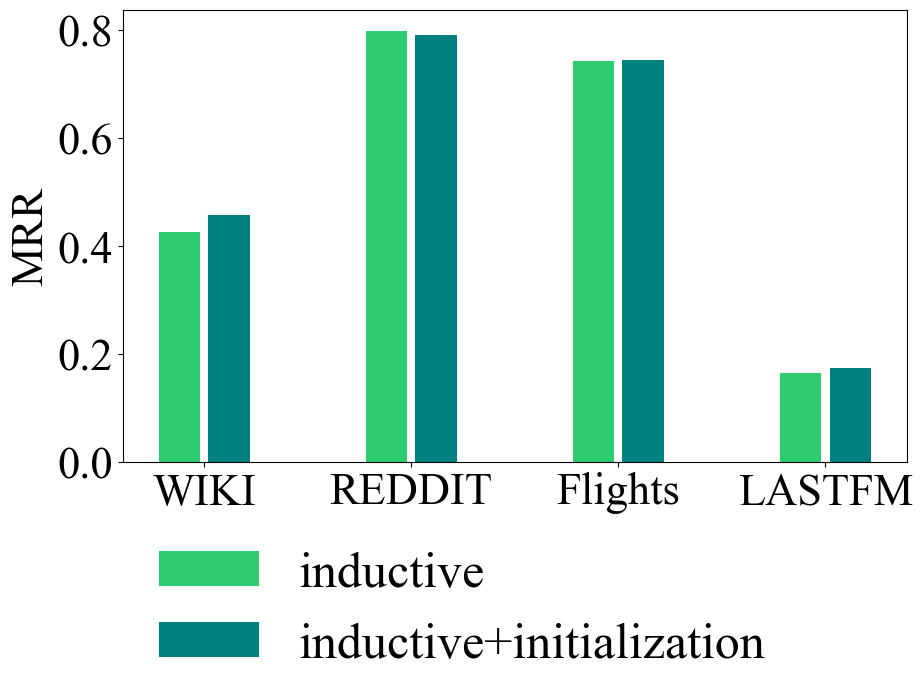

In [2]:
fig, ax = plt.subplots(1, figsize=(10, 6))
handles = []
all_data = {}
for i, embed in enumerate(['embedF', 'embedT']):
    res = []
    lbl = 'inductive' if embed == 'embedF' else 'inductive+initialization'
    for dataset in datasets:
        res.append(data[dataset][embed])
    h_bar = ax.bar(np.array(range(len(res)))+0.24*i-0.12, width=0.2, height=res, capsize=5, color=colors[i*2+3], label=lbl)
    handles.append(h_bar)
    if i == 0:
        all_data['before'] = res
    else:
        all_data['after'] = res
    # ax.set_xlabel(f'# of Neighbors')
ax.set_ylabel(f'MRR')
ax.set_xticks(range(0,4))
ax.set_xticklabels(datasets)
# axes[0].set_ylim([-0.05, 0.4])
# axes[1].set_ylim([-0.05, 0.2])
plt.tight_layout()
fig.legend(handles=handles, frameon=False, bbox_to_anchor=(0.5, -0.08), loc='center', fontsize=36, borderaxespad=0, markerscale=1.5, ncol=1)
plt.savefig(f'../figures/all_datasets_embed_strategy.pdf', bbox_inches='tight')
df_all = pd.DataFrame(all_data)
df_all.to_csv('../tikz_data/embed_strategy.csv', index=False)